<a href="https://colab.research.google.com/github/1Light/Experimental-physics-lab/blob/main/Four%20Probe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Four Probe Method





In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

print("imported")

imported


In [13]:
df = pd.read_excel(r'/home/ashwin/Git/general-physics-lab/fourProbe/foreprobe.xlsx')
print(df)

      T    V_H   V_C   V_avg  Unnamed: 4  Unnamed: 5  Unnamed: 6   V_M
0    30  99.70  99.7  99.700         NaN        99.7         303  93.0
1    35  76.20  76.2  76.200         NaN        76.2         308  93.0
2    40  63.90  78.6  71.250         NaN        71.3         313  92.5
3    45  51.10  64.3  57.700         NaN        57.7         318  91.0
4    50  42.60  52.9  47.750         NaN        47.8         323  87.5
5    55  36.30  43.6  39.950         NaN        40.0         328  82.5
6    60  31.10  36.1  33.600         NaN        33.6         333  77.0
7    65  26.60  30.3  28.450         NaN        28.5         338  70.5
8    70  23.10  25.5  24.300         NaN        24.3         343  64.0
9    75  19.80  21.7  20.750         NaN        20.8         348  57.5
10   80  17.10  18.7  17.900         NaN        17.9         353  51.0
11   85  14.80  15.9  15.350         NaN        15.4         358  45.0
12   90  12.90  13.7  13.300         NaN        13.3         363  38.5
13   9

In [28]:
T=df['T'].to_numpy()
V=df['V_avg'].to_numpy()
#If you want to inclead some other valuesuse the name from table
#and to incled values after 10 or somthing put split =10
split=0

T_all=T[split:]+273
V_all=V[split:]*0.1*0.001

T=T_all[:]
V=V_all[:]



    Voltage (mV)   T (K)      rho_0  rho (Ohms.cm)      1/T          log_Rho
0          9.9700     303  6.264336  11.3 +/- 1.59  3.30e-03   1.05 +/- 0.06
1          7.6200     308  4.787787  8.63 +/- 1.16  3.25e-03   0.94 +/- 0.06
2          7.1250     313  4.476770  8.07 +/- 1.08  3.19e-03   0.91 +/- 0.06
3          5.7700     318  3.625398  6.54 +/- 0.86  3.14e-03   0.82 +/- 0.06
4          4.7750     323  3.000221   5.41 +/- 0.7  3.10e-03   0.73 +/- 0.06
5          3.9950     328  2.510133  4.53 +/- 0.58  3.05e-03   0.66 +/- 0.06
6          3.3600     333  2.111150  3.81 +/- 0.49  3.00e-03   0.58 +/- 0.06
7          2.8450     338  1.787566  3.22 +/- 0.41  2.96e-03   0.51 +/- 0.06
8          2.4300     343  1.526814  2.75 +/- 0.35  2.92e-03   0.44 +/- 0.05
9          2.0750     348  1.303761   2.35 +/- 0.3  2.87e-03   0.37 +/- 0.05
10         1.7900     353  1.124690  2.03 +/- 0.26  2.83e-03   0.31 +/- 0.05
11         1.5350     358  0.964469  1.74 +/- 0.22  2.79e-03   0.24 +/- 0.05

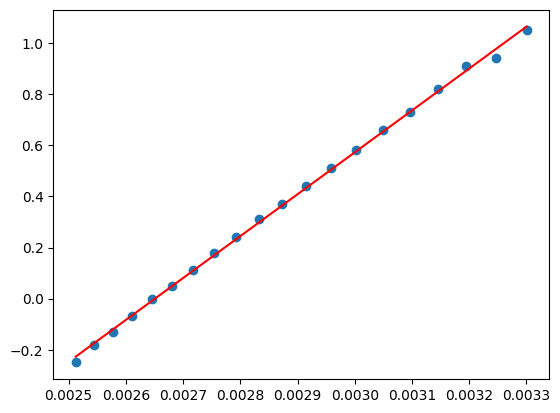

In [29]:
#T = [298.0, 308.0, 318.0, 328.0, 338.0, 348.0, 358.0, 368.0, 378.0, 388.0, 398.0, 408.0, 418.0, 428.0, 438.0] #in Kelvin
#V = [0.698, 0.662, 0.574, 0.46, 0.35, 0.261, 0.192, 0.142, 0.106, 0.081, 0.061, 0.048, 0.037, 0.03, 0.024]  #in Volts
I = 2.00 #mA

delta_V = 0.01 #V least count
delta_I = 0.1 #mA least count
delta_S = 0.1 #cm least count

S = 2.00 #mm
W = 4.00 #mm
t = 0.50 #mm

Length = 1.2 #cm
Breadth = 0.9 #cm

is_Condictive_bottom = False

###
'''
 Do not edit Consant below 
'''
###

Length = Length * pow(10,-2) #M
Breadth = Breadth * pow(10,-2) #M

k = 8.6E-5

I = I * pow(10,-3) #A
delta_I = 0.01 * pow(10,-3)
S = S * pow(10,-1)#cm
W = W * pow(10,-3) #M
t = t * pow(10,-3)  #M


G7 = 2 * np.log(2) * S / t 

def rho_0(V, I):
    #print ((V / I ) * 2 * np.pi * S)
    return (V / I ) * 2 * np.pi * S #100 forcm

def rho(V, I):
  return rho_0( V , I )  *10/G7

def F1():
    t_S = t/S
    if (is_Condictive_bottom):
        correction = t_S /( 2 * np.log(np.cosh(t_S) / np.cosh(t_S/2)))
        print("Doing Thickness effect correction for Condictive bottom ",correction)
    else:
        correction = t_S /( 2* np.log(np.sinh(t_S) / np.sinh(t_S/2)))
        print("Doing Thickness effect correction for Non Condictive bottom ",correction)
    return correction
 
def F0():
    t_S = t/S
    correction = t_S /( 2* np.log(2) )
    print("Doing Thickness effect correction for Non Condictive bottom ",correction)
    return correction
 
    
def F2() :
    d_S = Length / S
    if (Length >= 40* S):
        correction = 1
    else:
        correction = np.log(2) / ( np.log(2) + np.log( (d_S**2 + 3)/(d_S**2 - 3) ))
        print("Doing Lateral size effect correction ",correction)
    return correction
                                     
def F():
    return F1()*F2()

def DelRhoFn(rho_i , V  ):
    const =  2 * np.pi  #* F_correction 
    val = const * rho_i * np.sqrt( pow((S/delta_S),2)+pow((V/delta_V),2) + pow((delta_I / I ),2) )
    #print(pow((S/delta_S),2))
    return val

def DellogRhoFn(rho_i,V):
    val=DelRhoFn(rho_i , V )/rho_i
    return val

F_correction =1#*F()

Rho = []
T_1 = [] #10^-3
T_1_table=[]
log_Rho = [] 
srNo = []
RhoTable = []
delta_Rho = []
log_Rho_table=[]
rho_0_tab=[]
DelRhoFni=[]
for i in range(len(T)):
  srNo.append(i+1)
  rho_i = rho(V[i], I)
  rho_0_tab.append(rho_0(V[i], I))
  Rho.append( "{:.2e}".format(rho_i)  )

  delta_Rho.append(DelRhoFn(rho_i,V[i]))
  RhoTable.append( str(round(rho_i * 100 , 2)) + " +/- "+ str(round( DelRhoFn(rho_i,V[i]) ,2))) 
  DelRhoFni.append(round( DelRhoFn(rho_i,V[i]) ,2))
  T_1.append( 1 / T[i] )
  T_1_table.append( "{:.2e}".format(1 / T[i]) )
  log_Rho.append ( round(np.log10( rho_i*100),2 ))

  log_Rho_table.append ( str(round(np.log10( rho_i*100),2 )) + " +/- "+ str(round( DelRhoFn(rho_i,V[i]) /(np.log(10)*rho_i * 100) ,2)))
 

table = { #'Serial no ' :  srNo,
         'Voltage (mV) ': V*1000,
         'T (K) ': T,
         'rho_0':rho_0_tab,
         #'rho (Ohms.cm)': Rho,
         'rho (Ohms.cm)': RhoTable,
         #'Delta rho (Ohms.m)': delta_Rho,
         '1/T ': T_1_table,
         'log_Rho': log_Rho_table }

# log to base e is used and the Temp in Table is in terms of 10^-3

dataframe = pd.DataFrame(table)
print(dataframe)

result = linregress(T_1, log_Rho)

m = result.slope
b = result.intercept
delta_m = result.stderr 
#delta_b = result.intercept_stderr 


plt.scatter(T_1, log_Rho)
plt.plot(T_1, np.array(T_1) * m + b , color="red")  
print("Energy Band Gap in eV = " , round( 2.3026*10**3*2*8.617*10**-5 *10**-3* m,2))

In [30]:
round(1640.2378575523064*2.3026*10**3*2*8.617*10**-5,4)


650.8957

In [31]:
np.log10(11296.91)

4.052959668840564

In [32]:
0.2

0.2

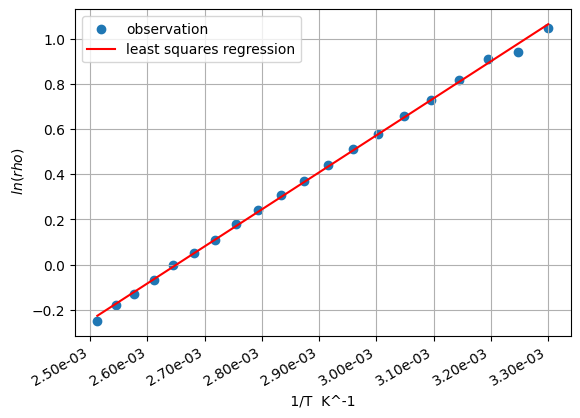

Energy Band Gap in eV = 0.65


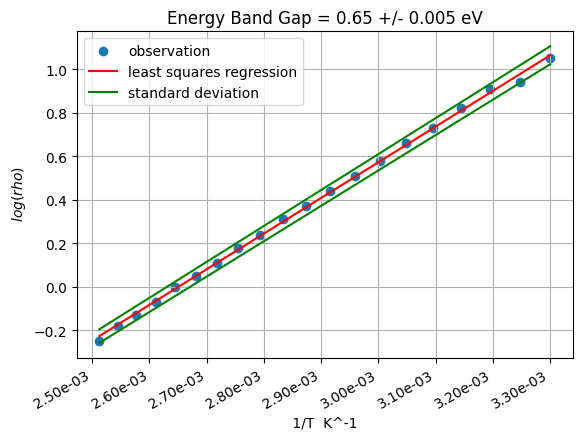

Energy Band Gap = 0.65 +/- 0.005  eV


In [33]:
import matplotlib.ticker as mtick

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(T_1, log_Rho,label = 'observation')
ax.plot(T_1, np.array(T_1) * m + b , color="red",label = 'least squares regression')
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

ax.legend()
plt.xlabel(r" 1/T  K^-1 ")
plt.ylabel(r" $ln(rho)$")

fig.autofmt_xdate()
plt.grid("TRUE")
plt.show()

print("Energy Band Gap in eV =" , round(2.3026*10**3*2*8.617*10**-5 *10**-3* m ,2))


fig2 = plt.figure()

ay = fig2.add_subplot(111)


ay.scatter(T_1, log_Rho,label = 'observation')

ay.plot(T_1, np.array(T_1) * m + b , color="red",label = 'least squares regression')
ay.plot(T_1, np.array(T_1) * (m +delta_m ) + b , color="green",label = 'standard deviation')
ay.plot(T_1, np.array(T_1) * (m-delta_m) + b , color="green")



ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ay.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))


plt.xlabel(r" 1/T  K^-1 ")
plt.ylabel(r" $log(rho)$")
fig2.autofmt_xdate()
plt.grid("TRUE")
plt.title("Energy Band Gap = {0} +/- {1} eV".format( round(2.3026*10**3*2*8.617*10**-5 *10**-3* m ,2), round(2.3026*10**3*2*8.617*10**-5 *10**-3*delta_m ,3) ))
ay.legend()
plt.show()

print("Energy Band Gap = {0} +/- {1}  eV".format( round(2.3026*10**3*2*8.617*10**-5 *10**-3* m ,2), round(2.3026*10**3*2*8.617*10**-5 *10**-3*delta_m ,4) ))

fig2.savefig("FigSlopeUnc.png")

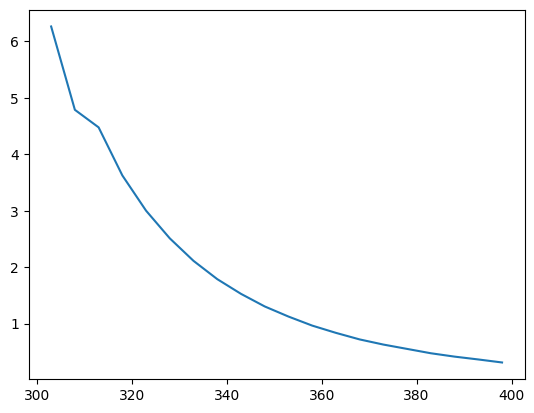

In [34]:
plt.plot(T,rho_0_tab)